In [21]:
import os
import pandas as pd
import numpy as np
import preprocessing as proc
from pandas.api.types import CategoricalDtype
import seaborn as sns
from matplotlib import pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

%matplotlib inline

plt.style.use('seaborn-ticks')
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

pd.options.display.max_columns = 1000

DATA_PATH = '../cell-profiler/measurements'
SUFFIX = 'normbg_'
CYTOPLASM = True
ZERNIKE = True
BIOMARKERS = True
CAPPED = True

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
measurements = proc.import_cell_data(data_path=DATA_PATH, suffix=SUFFIX, cytoplasm=CYTOPLASM, biomarkers=BIOMARKERS)

Morphology was measured for 610.0 cells.

The numbers of cells and nuclei correspond to each other.

The are no duplicated column names: True
The are no duplicated column names: True
Cytoplasm measurements were taken for 610 cells.

The are no duplicated column names: True
Biomarkers were measured for 610 cells.

The are no duplicated column names: True

Full dataset has shape: (610, 555)


In [9]:
measurements = proc.clean_data(measurements)

Initial shape is: (610, 555)
Features with zero variance:
 Index(['centerZ_cell', 'eulernumber_cell', 'children_cytoplasm_count_cell',
       'loc_centermassintensityZ_wga_cell', 'loc_centerZ_cell',
       'loc_maxintensityZ_wga_cell', 'centerZ_nucl', 'eulernumber_nucl',
       'children_cells_count', 'children_cytoplasm_count_nucl',
       'loc_centermassintensityZ_dapi', 'loc_centermassintensityZ_wga_nucl',
       'loc_centerZ_nucl', 'loc_maxintensityZ_dapi',
       'loc_maxintensityZ_wga_nucl', 'centerZ_cyto',
       'loc_centermassintensityZ_ker', 'loc_centermassintensityZ_vim',
       'loc_centerZ', 'loc_maxintensityZ_ker', 'loc_maxintensityZ_vim'],
      dtype='object')

After cleaning the dataset has 610 rows and 500 columns.



In [29]:
measurements = proc.drop_corr_features(measurements, zernike=ZERNIKE, biomarkers=BIOMARKERS, capped=CAPPED)

Initial shape: (610, 500)
Drop features with Pearson's correlation coefficient >= 90%.

Selected 10 cell shape features.
Selected 29 cell zernike features:
Selected 11 cell intensity features.
Selected 5 cell neighbours features.
Selected 11 cell texture features.
Selected 9 nuclear shape features.
Selected 30 nuclear zernike features.
Seleted 20 nuclear intensity features.
Seleted 4 nuclear neighbours features.
Seleted 29 nuclear texture features.
Seleted 8 distance measurement features.
Selected 23 biomarker intensity features.
Selected 36 biomarker texture features.

After performing feature selection the dataset has 610 rows and 223 columns.



In [3]:
measurements.head()

,label,image,object,combination,site,stiffness,well,area_cell,centerX_cell,centerY_cell,centerZ_cell,compactness_cell,eccentricity_cell,eulernumber_cell,extent_cell,formfactor_cell,majoraxislength_cell,maxferetdiameter_cell,maximumradius_cell,meanradius_cell,medianradius_cell,minferetdiameter_cell,minoraxislength_cell,orientation_cell,perimeter_cell,solidity_cell,zernike_0_0_cell,zernike_1_1_cell,zernike_2_0_cell,zernike_2_2_cell,zernike_1_cell,zernike_3_cell,zernike_4_0_cell,zernike_4_2_cell,zernike_4_4_cell,zernike_5_1_cell,zernike_5_cell,zernike_5_5_cell,zernike_6_0_cell,zernike_6_2_cell,zernike_6_4_cell,zernike_6_6_cell,zernike_7_1_cell,zernike_7_cell,zernike_7_5_cell,zernike_7_7_cell,zernike_8_0_cell,zernike_8_2_cell,zernike_8_4_cell,zernike_8_6_cell,zernike_8_8_cell,zernike_9_1_cell,zernike_9_cell,zernike_9_5_cell,zernike_9_7_cell,zernike_9_9_cell,children_cytoplasm_count_cell,integratedintensityedge_wga_cell,integratedintensity_wga_cell,lowerquartileintensity_wga_cell,madintensity_wga_cell,massdisplacement_wga_cell,maxintensityedge_wga_cell,maxintensity_wga_cell,meanintensityedge_wga_cell,meanintensity_wga_cell,medianintensity_wga_cell,minintensityedge_wga_cell,minintensity_wga_cell,stdintensityedge_wga_cell,stdintensity_wga_cell,upperquartileintensity_wga_cell,loc_centermassintensityX_wga_cell,loc_centermassintensityY_wga_cell,loc_centermassintensityZ_wga_cell,loc_centerX_cell,loc_centerY_cell,loc_centerZ_cell,loc_maxintensityX_wga_cell,loc_maxintensityY_wga_cell,loc_maxintensityZ_wga_cell,anglebetweenneighbors_cell,firstclosestdistance_cell,firstclosestobjectnumber_cell,numberofneighbors_cell,percenttouching_cell,secondclosestdistance_cell,secondclosestobjectnumber_cell,number_object_number_cell,parent_nuclei_x,angularsecondmoment_wga_00_cell,angularsecondmoment_wga_01_cell,angularsecondmoment_wga_02_cell,angularsecondmoment_wga_03_cell,contrast_wga_00_cell,contrast_wga_01_cell,contrast_wga_02_cell,contrast_wga_03_cell,correlation_wga_00_cell,correlation_wga_01_cell,correlation_wga_02_cell,correlation_wga_03_cell,differenceentropy_wga_00_cell,differenceentropy_wga_01_cell,differenceentropy_wga_02_cell,differenceentropy_wga_03_cell,differencevariance_wga_00_cell,differencevariance_wga_01_cell,differencevariance_wga_02_cell,differencevariance_wga_03_cell,entropy_wga_00_cell,entropy_wga_01_cell,entropy_wga_02_cell,entropy_wga_03_cell,infomeas1_wga_00_cell,infomeas1_wga_01_cell,infomeas1_wga_02_cell,infomeas1_wga_03_cell,infomeas2_wga_00_cell,infomeas2_wga_01_cell,infomeas2_wga_02_cell,infomeas2_wga_03_cell,inversedifferencemoment_wga_00_cell,inversedifferencemoment_wga_01_cell,inversedifferencemoment_wga_02_cell,inversedifferencemoment_wga_03_cell,sumaverage_wga_00_cell,sumaverage_wga_01_cell,sumaverage_wga_02_cell,sumaverage_wga_03_cell,sumentropy_wga_00_cell,sumentropy_wga_01_cell,sumentropy_wga_02_cell,sumentropy_wga_03_cell,sumvariance_wga_00_cell,sumvariance_wga_01_cell,sumvariance_wga_02_cell,sumvariance_wga_03_cell,variance_wga_00_cell,variance_wga_01_cell,variance_wga_02_cell,variance_wga_03_cell,area_nucl,centerX_nucl,centerY_nucl,centerZ_nucl,compactness_nucl,eccentricity_nucl,eulernumber_nucl,extent_nucl,formfactor_nucl,majoraxislength_nucl,maxferetdiameter_nucl,maximumradius_nucl,meanradius_nucl,medianradius_nucl,minferetdiameter_nucl,minoraxislength_nucl,orientation_nucl,perimeter_nucl,solidity_nucl,zernike_0_0_nucl,zernike_1_1_nucl,zernike_2_0_nucl,zernike_2_2_nucl,zernike_1_nucl,zernike_3_nucl,zernike_4_0_nucl,zernike_4_2_nucl,zernike_4_4_nucl,zernike_5_1_nucl,zernike_5_nucl,zernike_5_5_nucl,zernike_6_0_nucl,zernike_6_2_nucl,zernike_6_4_nucl,zernike_6_6_nucl,zernike_7_1_nucl,zernike_7_nucl,zernike_7_5_nucl,zernike_7_7_nucl,zernike_8_0_nucl,zernike_8_2_nucl,zernike_8_4_nucl,zernike_8_6_nucl,zernike_8_8_nucl,zernike_9_1_nucl,zernike_9_nucl,zernike_9_5_nucl,zernike_9_7_nucl,zernike_9_9_nucl,children_cells_count,children_cytoplasm_count_nucl,integratedintensityedge_dapi,integratedintensityedge_wga_nucl,integra

In [30]:
meta_cols = measurements.select_dtypes(include=['object', 'category']).columns
feature_cols = measurements.select_dtypes(include=[np.number]).columns
biom_cols = [col for col in measurements.columns if 'ker' in col or 'vim' in col]
morph_cols = [col for col in feature_cols if col not in biom_cols]

In [11]:
X = measurements[feature_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.concat([measurements[meta_cols], 
                       pd.DataFrame(X_scaled, columns=feature_cols)], 
                      axis=1)

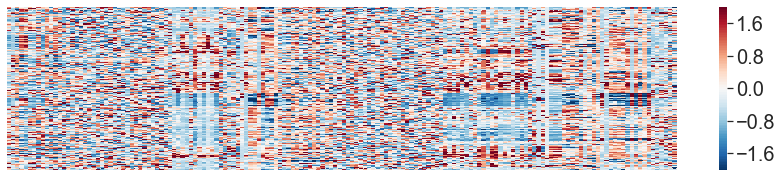

In [34]:
plt.rcParams['figure.figsize'] = (15, 3)


sns.heatmap(df_scaled[morph_cols],
            vmin = -2, vmax = 2,
            cmap=sns.color_palette("RdBu_r", 100),
            cbar_kws={"aspect": 20}, annot_kws={"size": 22},
            xticklabels=False, yticklabels=False);

plt.savefig('../results/All features heatmap.png', bbox_inches='tight', dpi=300);

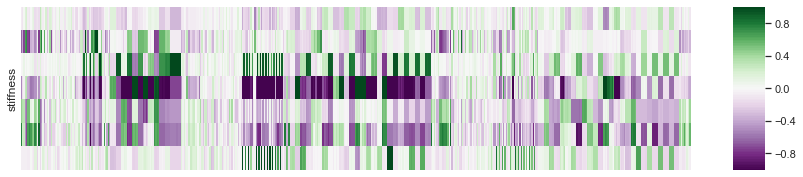

In [13]:
sns.set(rc={'figure.figsize':(15, 3)})

sns.heatmap(df_scaled.groupby('stiffness')[feature_cols].mean(), 
            vmin = -1, vmax = 1,
            cmap=sns.color_palette("PRGn", 100), 
            cbar_kws={"aspect": 5},
            xticklabels=False, yticklabels=False);

plt.savefig('../results/All features agg heatmap.png', bbox_inches='tight', dpi=300);